### Hypothesis Function:
$h(x) = \theta_0 + \theta_1x$

### Theta Update Rule:
$ \theta = \theta - \eta$ . $\frac{\partial J(\theta)}{\partial\theta}$ <br>
where $\eta$ is learning rate, which defines the step size (number of steps) <br>
$ \theta = \theta - \eta$ .  $\Delta_\theta J(\theta)$ <br>


### Total error:
$J(\theta) = \frac{1}{2}   \sum_{i=1}^{m} (h(x_i) - y_i)^2$ <br><br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Training Data

In [2]:
dfx = pd.read_csv("../Datasets/Linear Regression/linearX.csv")
dfy = pd.read_csv("../Datasets/Linear Regression/linearY.csv")

print(dfx.shape, dfy.shape)

x = dfx.values
y = dfy.values

(99, 1) (99, 1)


#### Visualise and Preprocess Input Data

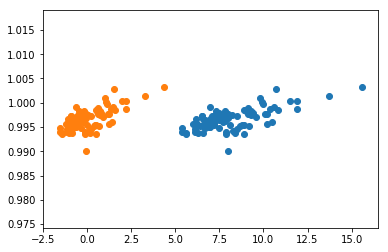

In [3]:
plt.scatter(x, y)

X = (x-x.mean())/x.std()
Y = y

plt.scatter(X, Y)
plt.show()

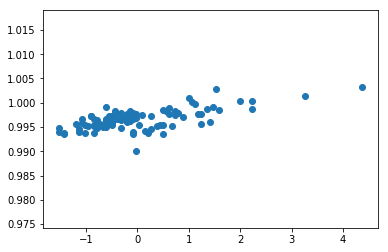

In [4]:
# Normalized data
plt.scatter(X, Y)
plt.show()

In [5]:
def hypothesis(x, theta):         # Takes in one value of X, ie, Xi (or small x)
    h = theta[0] + theta[1]*x
    return h

def error(X, Y, theta):           # To compute total error using hypothesized value (Xi, theta) and actual value (Yi)
    total_error = 0
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i], theta)
        total_error += (hx - Y[i])**2
        
    return total_error

def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))          # vector of length 2, as we have to store theta0 and theta1
    
    for i in range(m):
        hx = hypothesis(X[i], theta)
        grad[0] += (hx - Y[i])
        grad[1] += ((hx - Y[i])*X[i])
    
    return grad

In [6]:
def gradientDescent(X, Y, learning_rate = 0.001):      # Try running for lr = 0.1, 0.01, 0.001 and see error graph
#     theta = np.zeros((2,))
    theta = np.array([-2.0,0.0])

    i = 0
    max_i = 100
    error_list = []
    theta_list = []
    
    while (i <= max_i):
        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)
        error_list.append(e)
        theta_list.append((theta[0], theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        i = i+1
        
    return theta, error_list, theta_list

In [7]:
final_theta, error_list, theta_list = gradientDescent(X, Y)
print(final_theta)

[0.996554  0.0013579]


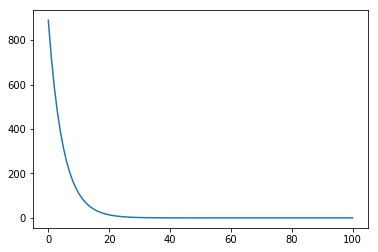

In [8]:
plt.plot(error_list)
plt.show()

# [0.99660456 0.0013579 ]
# [0.98839511 0.00134671]

In [9]:
# Testing Data
xtest = np.linspace(-2, 6, 10)
print(xtest)

# To create 10 equally spaced points between -2 and 6
# In our input, data points lie between -2 and 6 mainly
# So we can plot a line using these 10 points as test input supplied to hypothesis function
# So it will predict values and then we can plot a line where x coordinate is the value of these 10 points and
# y coordinate is the predicted value using our hypothesis

# So when this line is plotted, it gives an idea of how well this line passes through our data

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


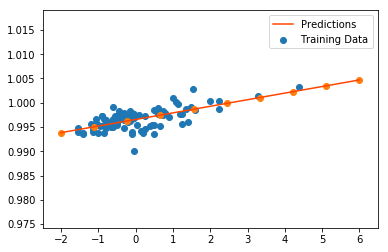

In [10]:
y_predicted = hypothesis(xtest, final_theta)
plt.scatter(X, Y, label="Training Data")
plt.plot(xtest, y_predicted, color="orangered", label="Predictions")
plt.scatter(xtest, y_predicted)
plt.legend()
plt.show()

#### With convergence criteria as: Change in Error < 0.000001

In [ ]:
def gradientDescent2(X, Y, learning_rate = 0.001):      # Try running for lr = 0.1, 0.01, 0.001 and see error graph
    theta = np.zeros((2,))
    i = 0
    max_i = 100
    prev_e = 0
    e = np.inf
    error_list = []
    
    while (abs(prev_e - e) >= 0.000001):
        grad = gradient(X, Y, theta)
        prev_e = e
        e = error(X, Y, theta)
#         print(prev_e, e)
        error_list.append(e)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
    return theta,error_list

In [ ]:
final_theta2, error_list2 = gradientDescent2(X, Y)
print(final_theta2)
print(len(error_list2))

In [ ]:
plt.plot(error_list2)
plt.show()

In [ ]:
y_predicted2 = hypothesis(xtest, final_theta2)
plt.scatter(X, Y, label="Training Data")
plt.plot(xtest, y_predicted2, color="orangered", label="Predictions")
plt.scatter(xtest, y_predicted2)
plt.legend()
plt.show()

### Visualizing Gradient Descent

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
T0 = np.arange(-2,3,0.01)       # 500 points on X-axis
T1 = np.arange(-2,3,0.01)       # 500 points on Y-axis

T0, T1 = np.meshgrid(T0,T1)     # 500 coordinates on XY plane, to plot J against   
J = np.zeros(T0.shape)

m = T0.shape[0]
n = T0.shape[1]

# Plot J on Z-axis for all these 500*500 points (all possible values of theta, 
# then we'll see trajectory of our values of theta)

for i in range(m):
    for j in range(n):
        J[i,j] = np.sum((T0[i,j] + T1[i,j]*X - Y)**2)    
        
print(T0.shape, J.shape)

(500, 500) (500, 500)


In [13]:
theta_list = np.array(theta_list)
print(theta_list.shape)
print(np.array(error_list).shape)

(101, 2)
(101, 1)


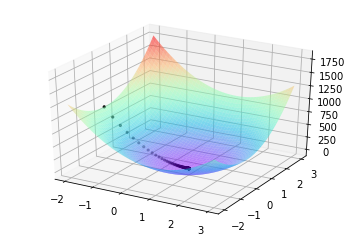

In [15]:
# Plotting 3D loss
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.scatter(theta_list[:,0], theta_list[:,1],error_list, c='k', marker='.')
axes.plot_surface(T0, T1, J, cmap='rainbow', alpha=0.5)
plt.show()

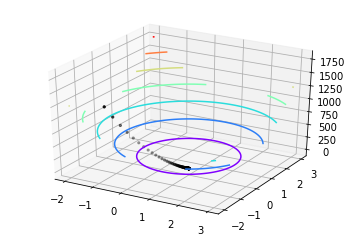

In [21]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1],error_list, marker='.', color='k')
plt.show()

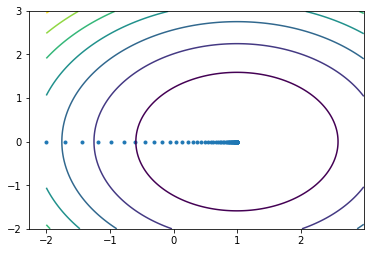

In [22]:
plt.contour(T0, T1, J)
plt.scatter(theta_list[:,0], theta_list[:,1], marker='.')
plt.show()